In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, train

io.logger_setup()

train_dir = '/Users/noah/Downloads/Finetune Augmentation/Training'
test_dir = '/Users/noah/Downloads/Finetune Augmentation/Validation'



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


2025-05-22 01:27:42,749 [INFO] WRITING LOG OUTPUT TO /Users/noah/.cellpose/run.log
2025-05-22 01:27:42,749 [INFO] 
cellpose version: 	4.0.2 
platform:       	darwin 
python version: 	3.12.9 
torch version:  	2.7.0


In [2]:
output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_cp_masks", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.001, learning_rate=1e-4,
                            n_epochs=250, model_name="finetune augmentation 2",)

2025-05-22 01:27:46,114 [INFO] not all flows are present, running flow generation for all images
2025-05-22 01:27:46,575 [INFO] 63 / 63 images in /Users/noah/Downloads/Finetune Augmentation/Training folder have labels
2025-05-22 01:27:46,591 [INFO] not all flows are present, running flow generation for all images
2025-05-22 01:27:46,668 [INFO] 12 / 12 images in /Users/noah/Downloads/Finetune Augmentation/Validation folder have labels
2025-05-22 01:27:46,729 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 01:27:46,729 [INFO] >>>> using GPU (MPS)
2025-05-22 01:27:48,163 [INFO] >>>> loading model /Users/noah/.cellpose/models/cpsam
2025-05-22 01:27:49,415 [INFO] computing flows for labels


100%|██████████| 63/63 [01:05<00:00,  1.05s/it]

2025-05-22 01:28:55,369 [INFO] computing flows for labels



100%|██████████| 12/12 [00:11<00:00,  1.03it/s]

2025-05-22 01:29:07,080 [INFO] >>> computing diameters



100%|██████████| 12/12 [00:00<00:00, 289.04it/s]

2025-05-22 01:29:07,353 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-05-22 01:29:10,177 [INFO] >>> n_epochs=250, n_train=63, n_test=12
2025-05-22 01:29:10,178 [INFO] >>> AdamW, learning_rate=0.00010, weight_decay=0.00100
2025-05-22 01:29:10,179 [INFO] >>> saving model to /Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune augmentation 2
2025-05-22 01:29:41,098 [INFO] 0, train_loss=1.9444, test_loss=2.5106, LR=0.000000, time 30.92s
2025-05-22 01:31:36,893 [INFO] 5, train_loss=1.5125, test_loss=1.3543, LR=0.000056, time 146.71s
2025-05-22 01:33:31,983 [INFO] 10, train_loss=1.5919, test_loss=1.9896, LR=0.000100, time 261.80s
2025-05-22 01:37:18,117 [INFO] 20, train_loss=1.6558, test_loss=1.3443, LR=0.000100, time 487.94s
2025-05-22 01:41:03,711 [INFO] 30, train_loss=1.5777, test_loss=1.4289, LR=0.000100, time 713.53s
2025-05-22 01:44:49,287 [INFO] 40, train_loss=1.5689, test_loss=1.4576, LR=0.000100, time 939.11s
2025-05-22 01:48:35,276 [INFO] 50, train_loss=1.6107, test_loss=1

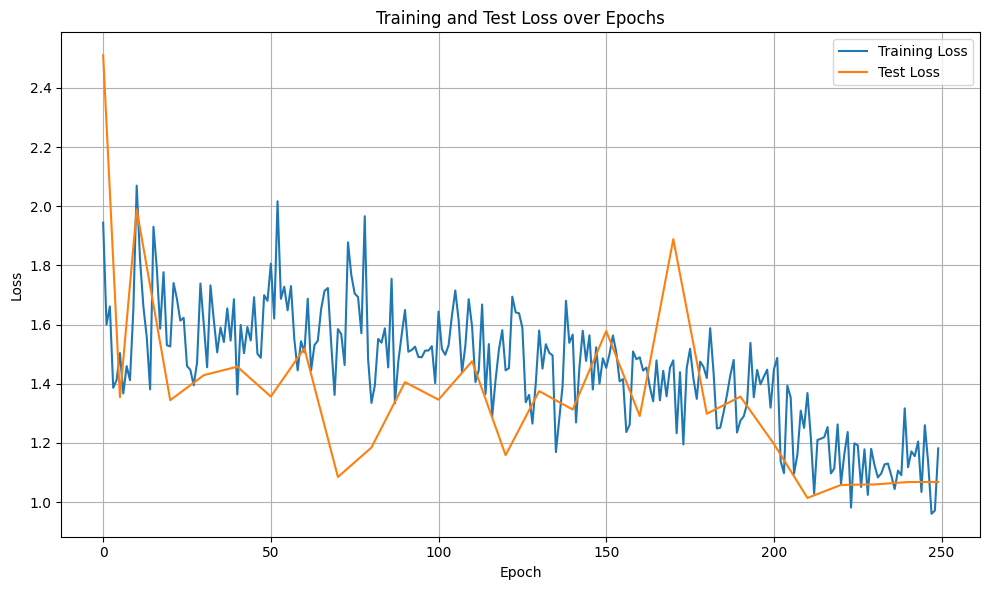

In [3]:
x = np.arange(len(test_losses))
mask = test_losses != 0
test_losses_interp = np.interp(x, x[mask], test_losses[mask])
test_losses_interp

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses_interp, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2025-05-22 04:03:41,437 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 04:03:41,438 [INFO] >>>> using GPU (MPS)
2025-05-22 04:03:42,441 [INFO] >>>> loading model models/finetune augmentation 2


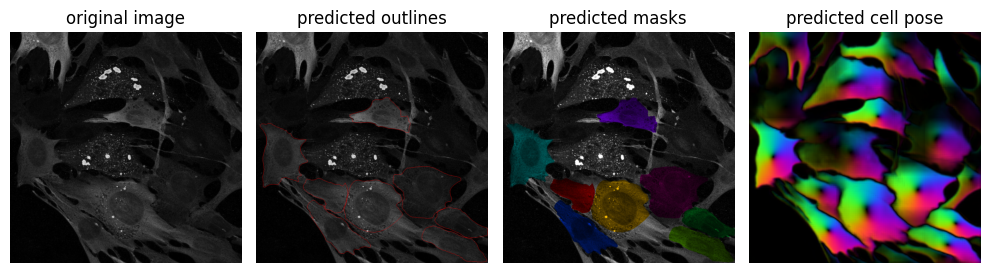

In [5]:
model = models.CellposeModel(pretrained_model="models/finetune augmentation 2",gpu=True)

img = io.imread('/Users/noah/Downloads/Finetune/Testing/15_img.tif')

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()